# Лабораторная работа 2

Классификация, оценка точности классификации.

Набор базовых данных о биологических сигналах здоровья.
Цель состоит в том, чтобы определить наличие или отсутствие курения с помощью биосигналов.

https://www.kaggle.com/datasets/kukuroo3/body-signal-of-smoking

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from kneed import KneeLocator
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate

In [32]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('./smoking.csv', delimiter=',', encoding='utf8')
del dfInit["ID"]
df = dfInit.copy(deep=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,Y,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,Y,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,Y,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,Y,0,N,0


#### Преобразование параметров

In [33]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
        
    print(f"{fieldName} = {dataDict}\n")

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [34]:
df.dropna(axis=0, inplace=True)

updateData(fieldName="gender")
updateData(fieldName="oral")
updateData(fieldName="tartar")

df

gender = {'M': 0, 'F': 1}

oral = {'Y': 0}

tartar = {'N': 0, 'Y': 1}



,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,1,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,73.0,94.0,215.0,82.0,73.0,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,0,1,0
1,1,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,70.0,130.0,192.0,115.0,42.0,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,0,1,0
2,0,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,86.0,89.0,242.0,182.0,55.0,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,0,1
3,0,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,60.0,96.0,322.0,254.0,45.0,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,0,1,0
4,1,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,74.0,80.0,184.0,74.0,62.0,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55687,1,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,68.0,89.0,213.0,99.0,75.0,118.0,12.3,1.0,0.6,14.0,7.0,10.0,0,1,1,0
55688,1,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,62.0,89.0,166.0,69.0,73.0,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,0,1,0
55689,1,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,72.0,88.0,158.0,77.0,79.0,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,0,0,0
55690,0,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,76.0,107.0,210.0,79.0,48.0,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,0,0,0


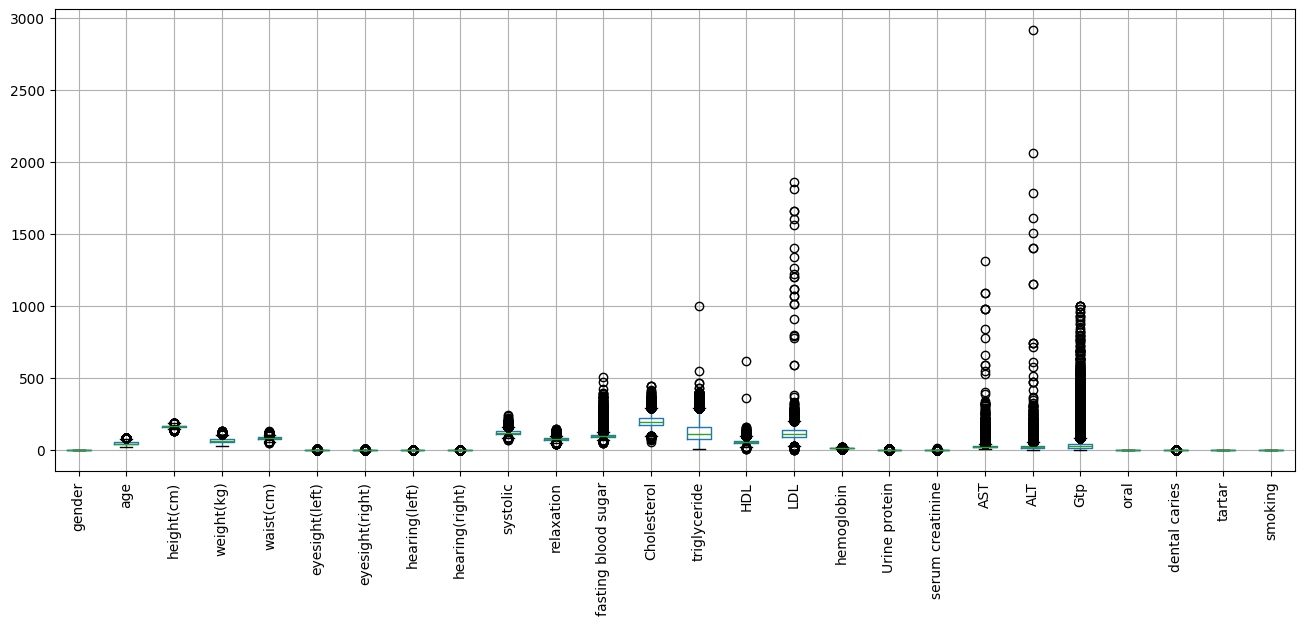

In [35]:
ax = df.boxplot(column=list(df.columns), figsize=(16,6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax
plt.show()

#### Разделение на обучающие и тестовые данные

In [36]:
x = df.drop(['smoking'], axis=1)
y = df['smoking']

xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [37]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTraining = scaler.transform(xTraining)
xTest = scaler.transform(xTest)

In [38]:
labelEncoder = preprocessing.LabelEncoder()
yTrainingEncoded = labelEncoder.fit_transform(yTraining)

#### k-ближайших соседей

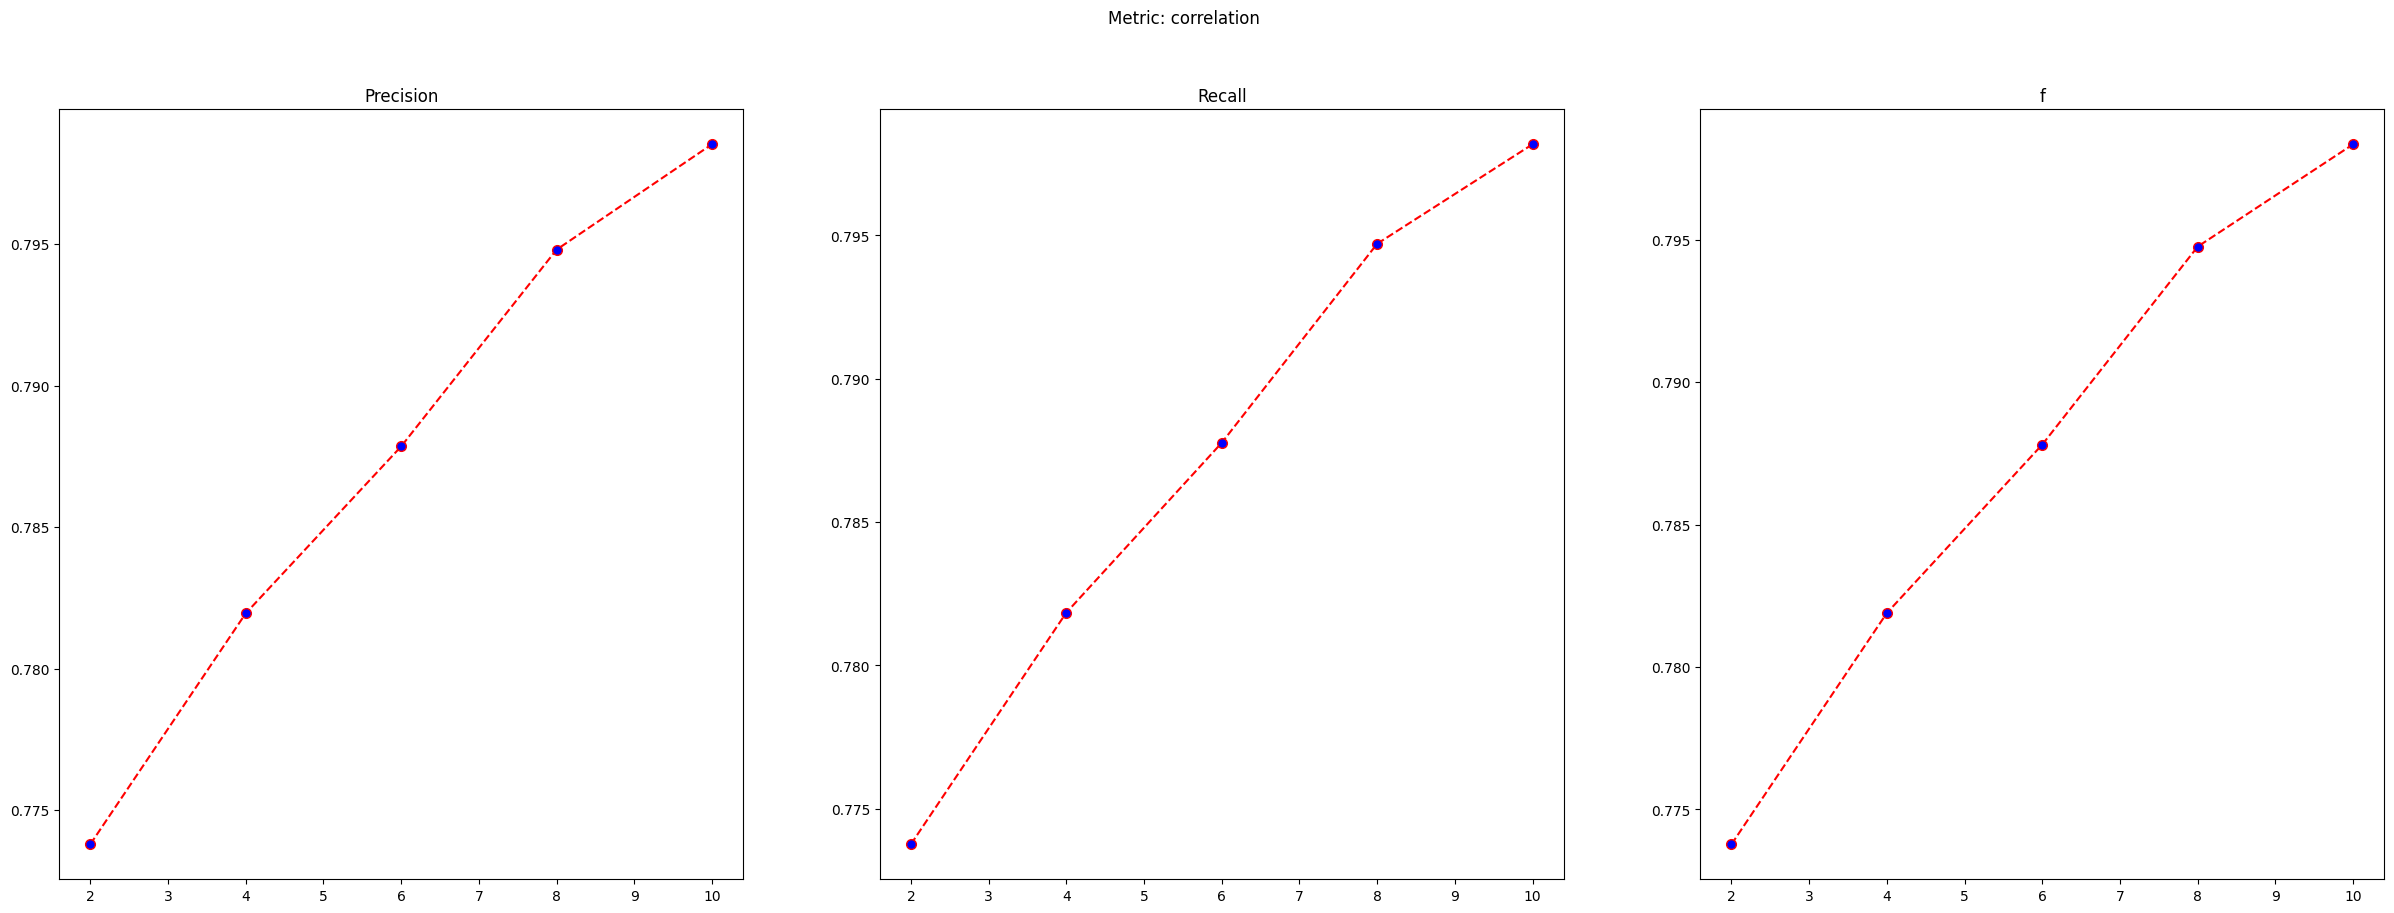

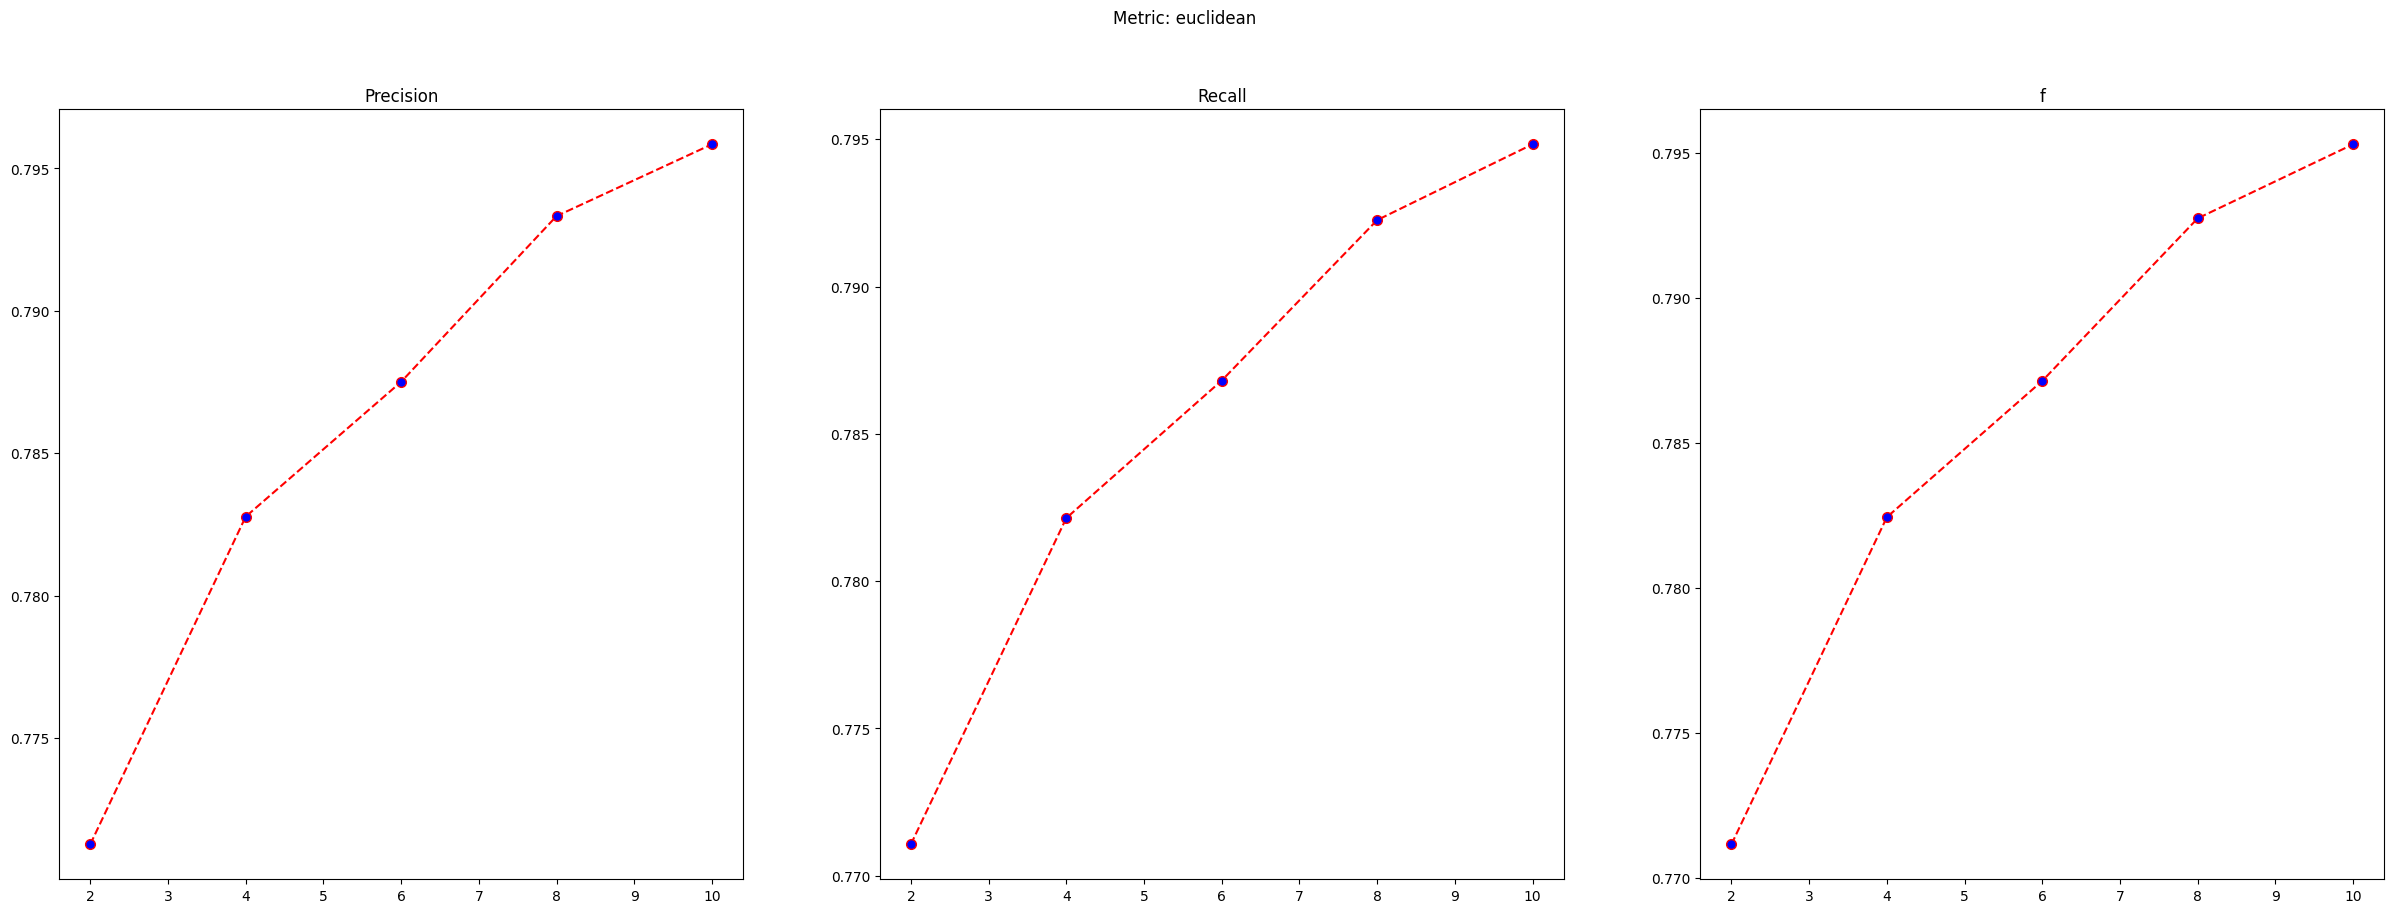

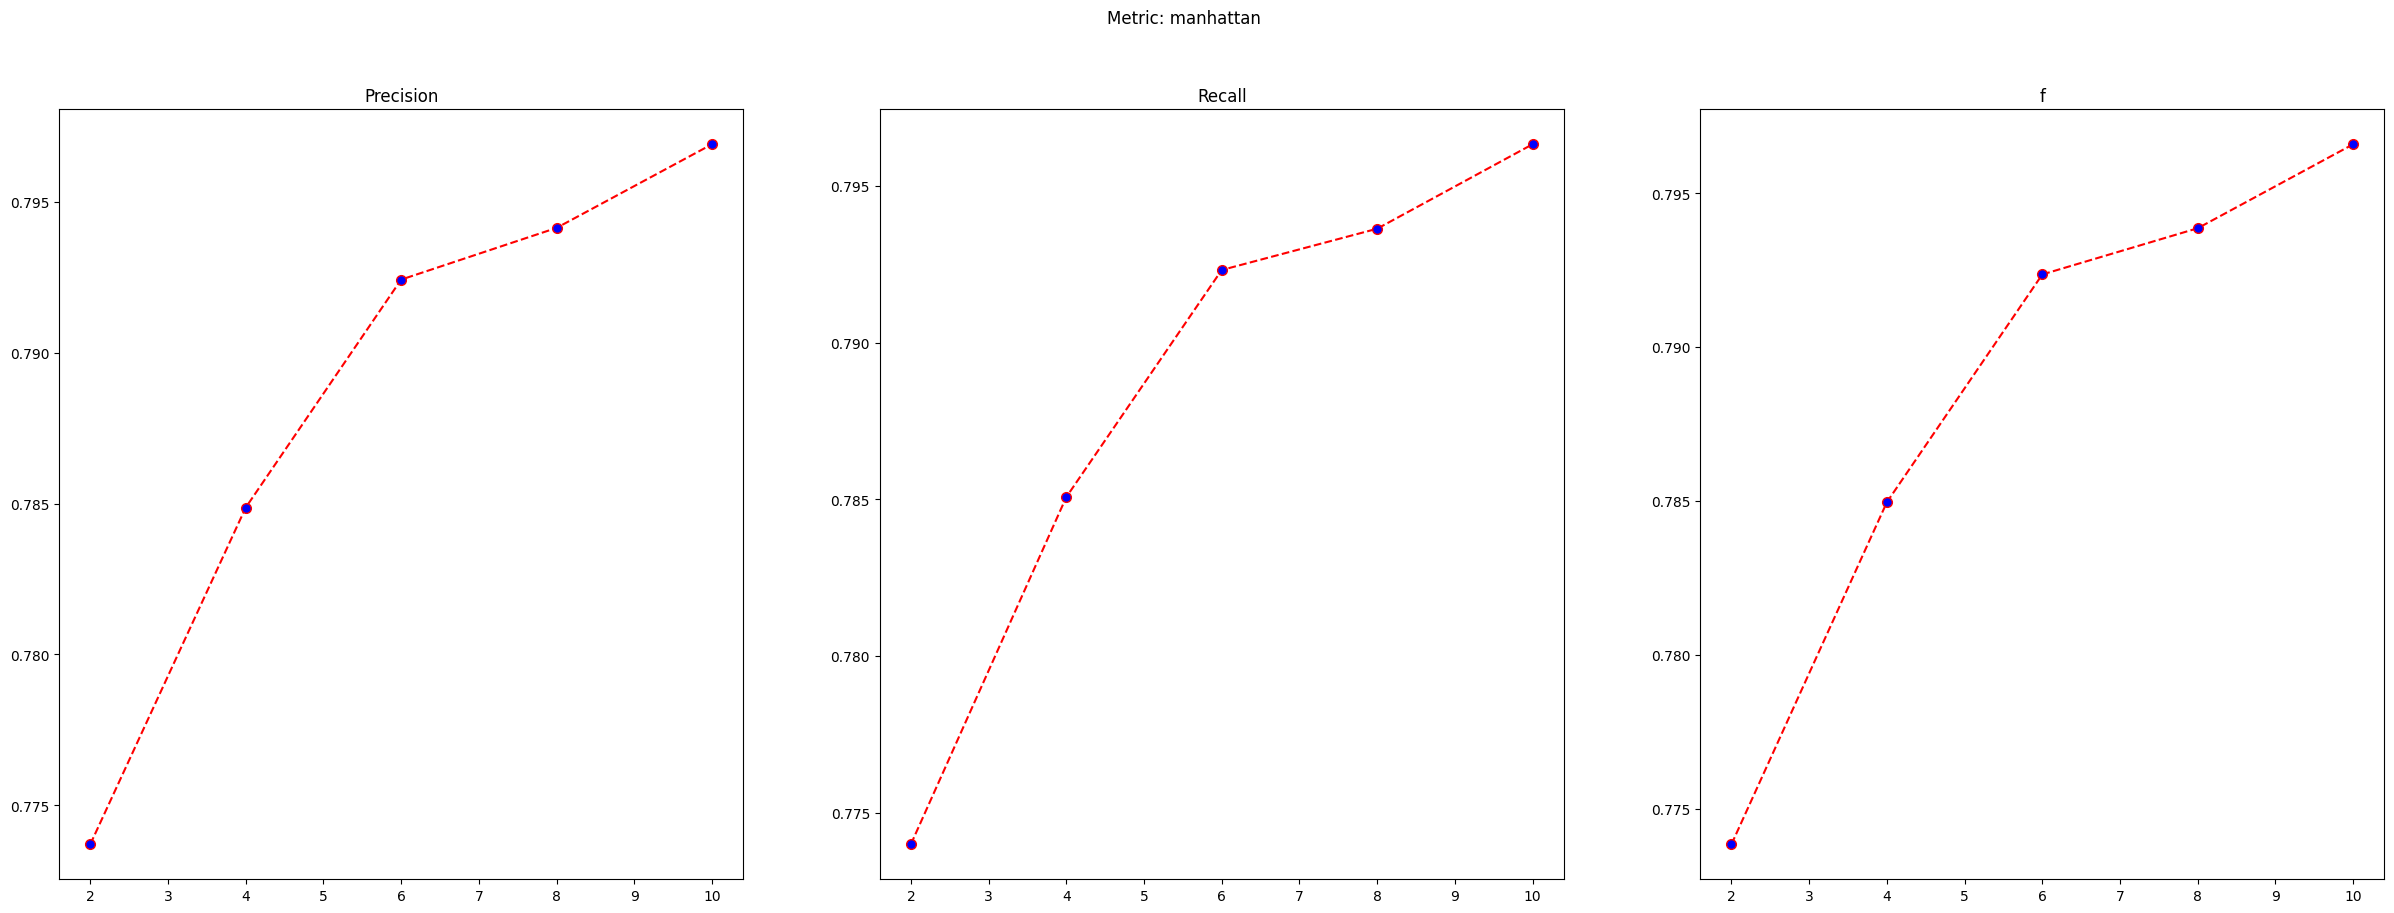

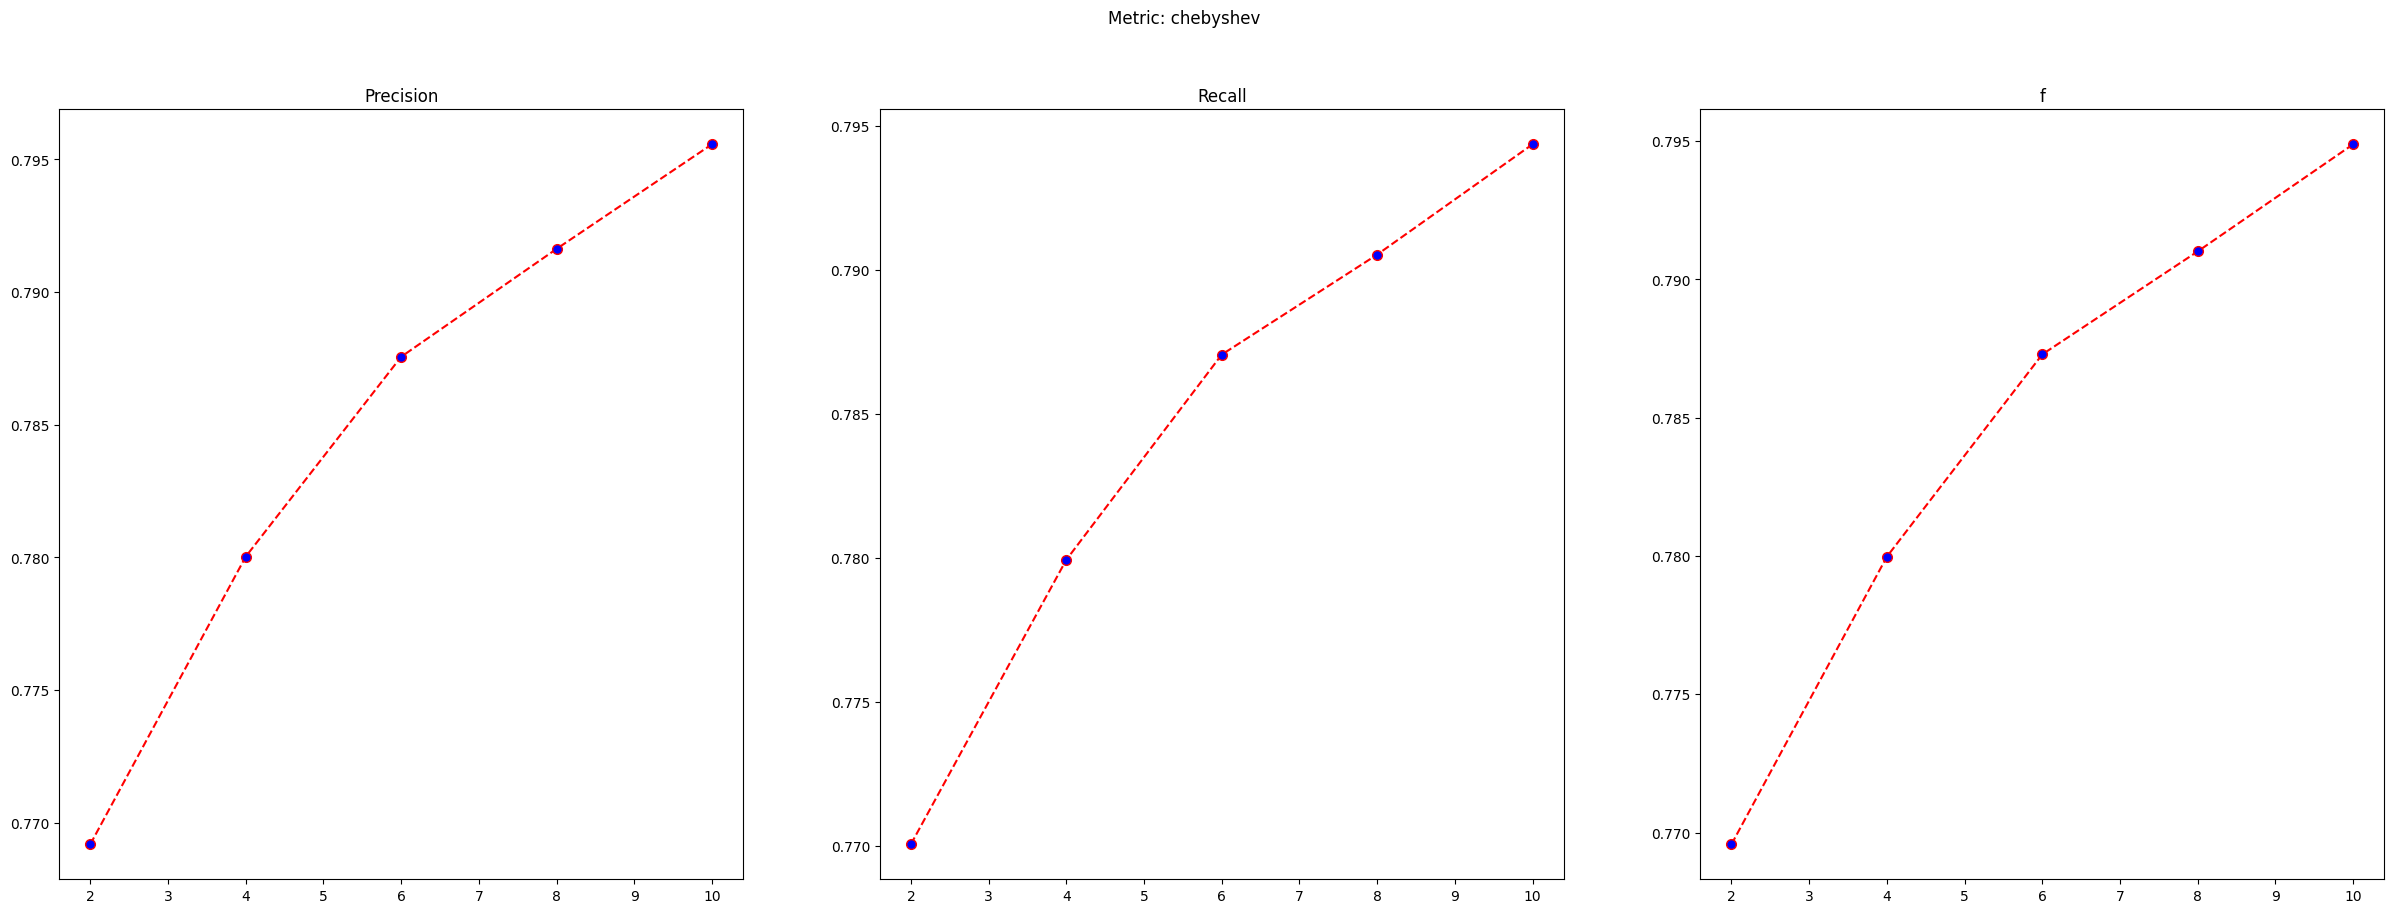

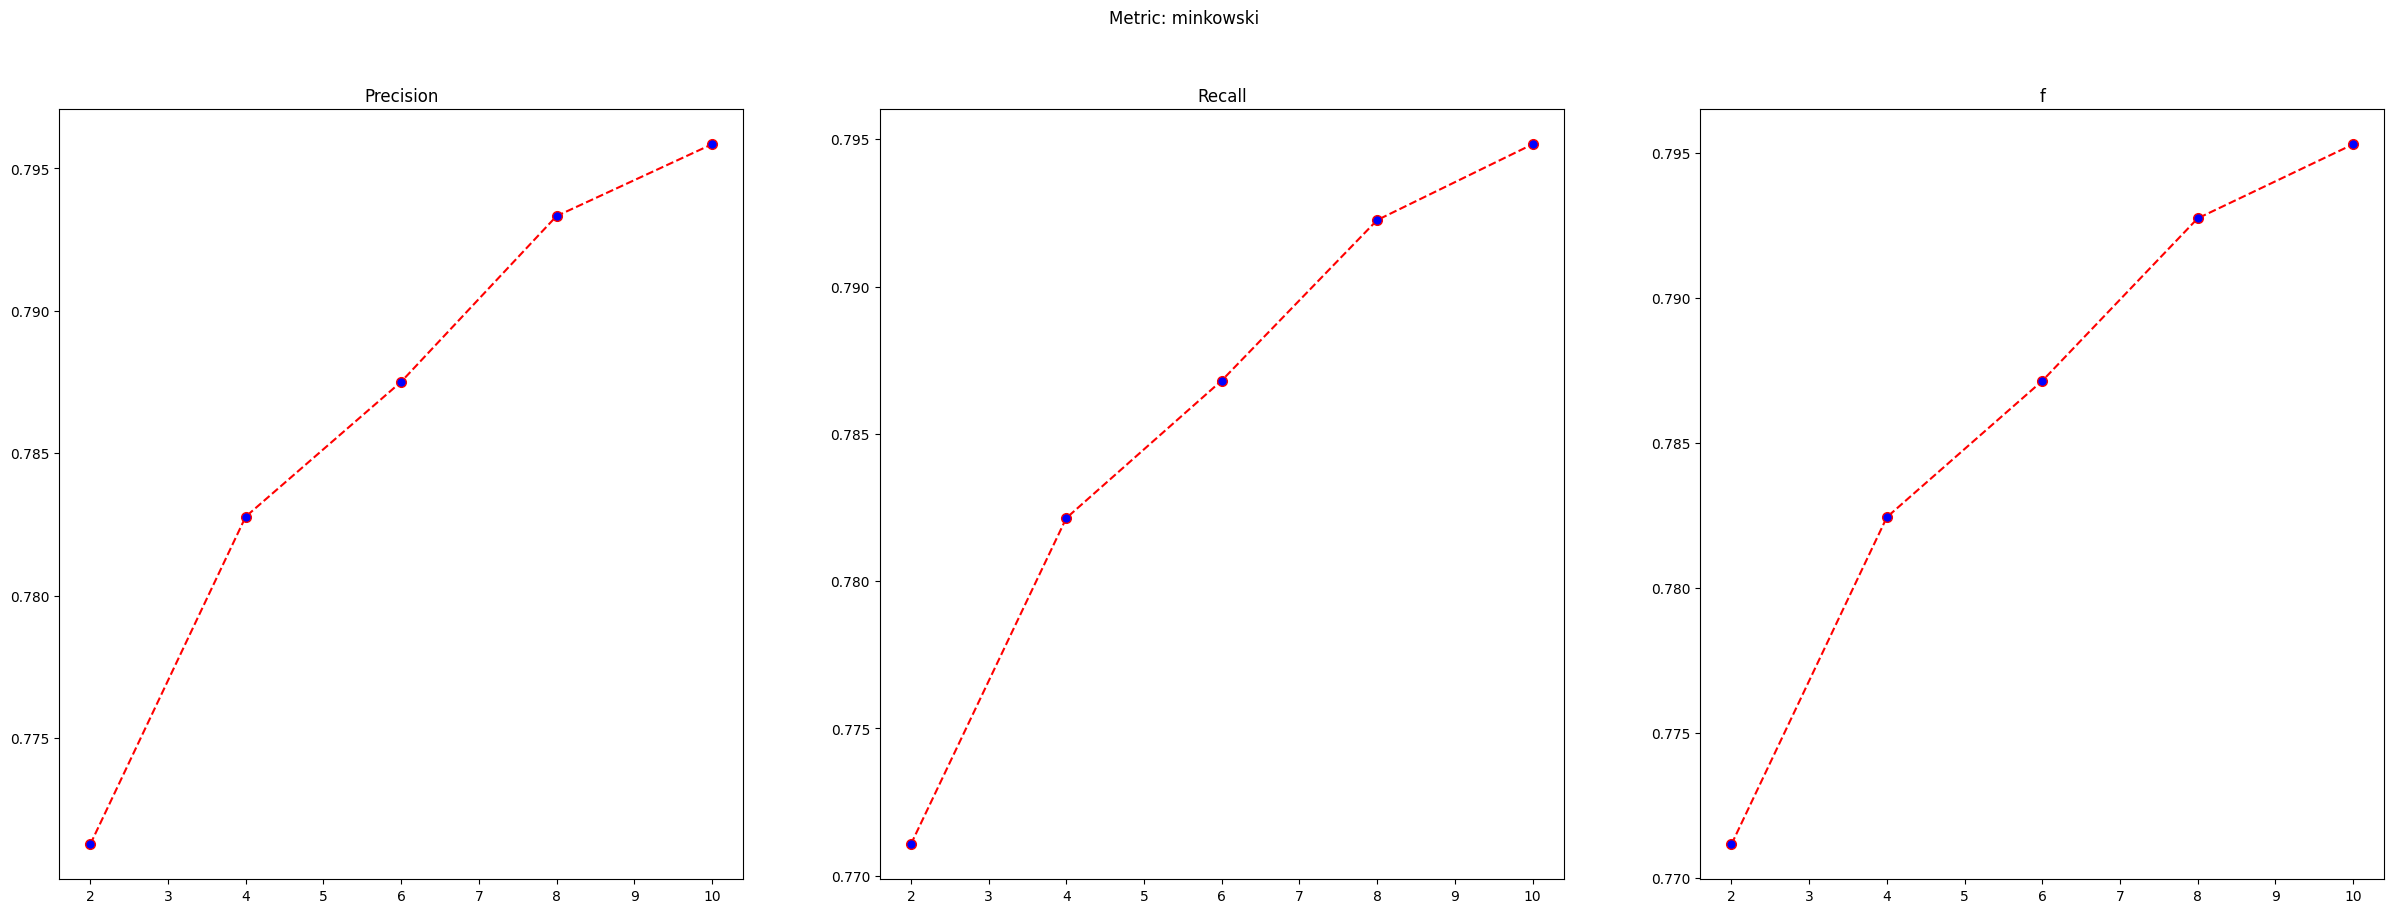

In [39]:
def doKNeightbors(m):
    precisionArr = []
    recallArr = []
    fArr = []

    neighborsRange = range(2, 12, 2)

    for i in neighborsRange:
        knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
        knn.fit(xTraining, yTraining)
        predict = knn.predict(xTest).tolist()

        metricsData = precision_recall_fscore_support(yTest, predict, average='weighted')

        precisionArr.append(np.average(metricsData[0]))
        recallArr.append(np.average(metricsData[1]))
        fArr.append(np.average(metricsData[2]))

    fig, ax = plt.subplots(1, 3, figsize=(30, 10))
    ax[0].plot(neighborsRange, precisionArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[1].plot(neighborsRange, recallArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)
    ax[2].plot(neighborsRange, fArr, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=7)

    ax[0].set_title("Precision")
    ax[1].set_title("Recall")
    ax[2].set_title("f")

    fig.suptitle("Metric: " + m)

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
    doKNeightbors(m)

plt.show()

#### Матрица ошибок

In [40]:
smoking = df["smoking"].unique()
smoking.sort()
print(smoking)

[0 1]


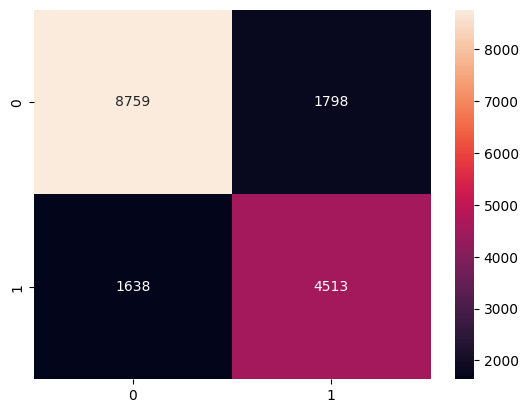

In [41]:
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', metric='chebyshev')
knn.fit(xTraining, yTraining)
predictions = knn.predict(xTest).tolist()

confusionMatrix = confusion_matrix(yTest, predictions)
cm = pd.DataFrame(confusionMatrix, columns=smoking, index=smoking)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

#### Метрики

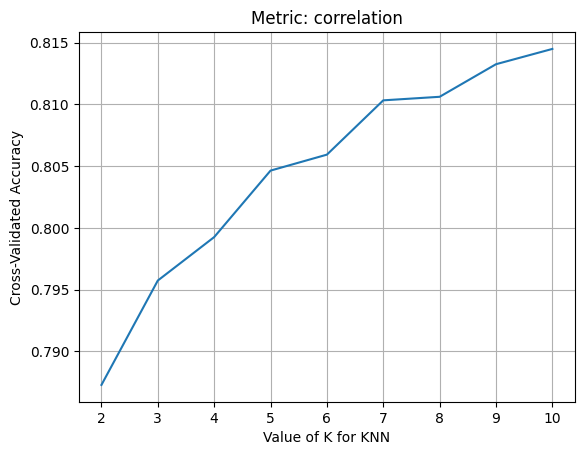

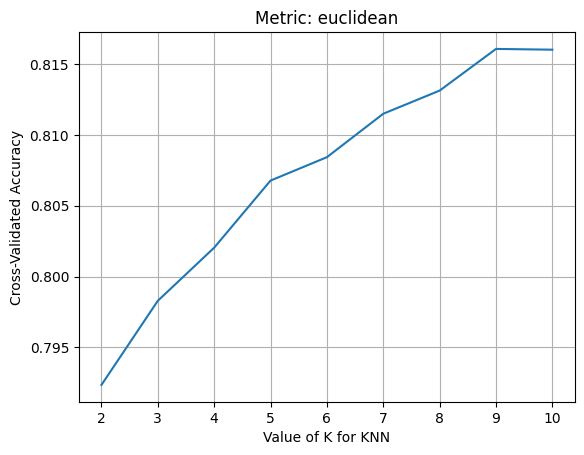

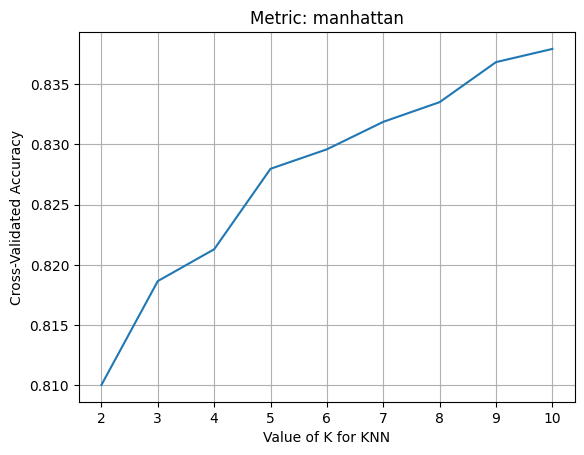

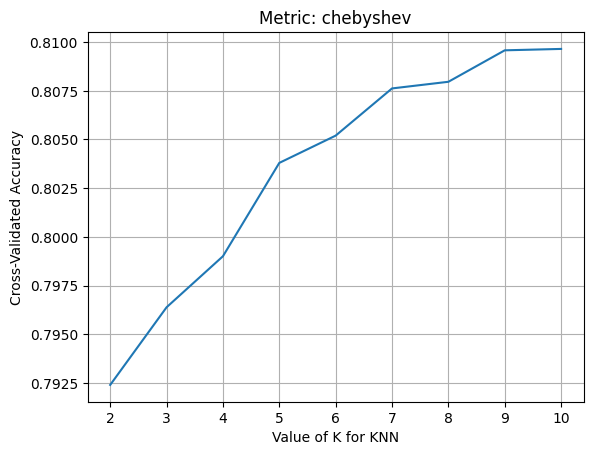

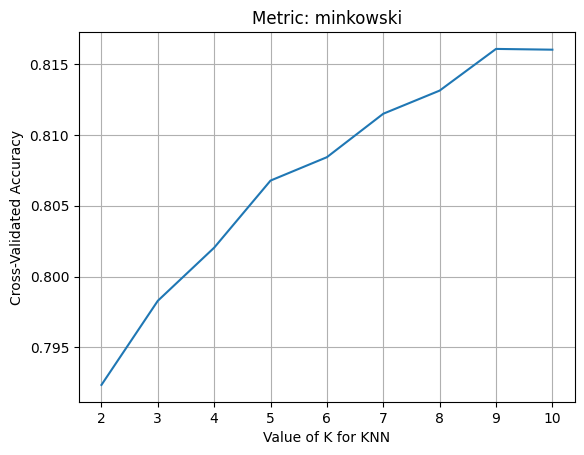

In [42]:
def doKNeightbors(m):
  kScores = []

  neighborsRange = range(2, 11)

  for i in neighborsRange:
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric=m)
    kScores.append(cross_val_score(knn, df, y, cv=5, scoring='accuracy').mean())

  plt.plot(neighborsRange, kScores)
  plt.title("Metric: " + m)
  plt.xlabel('Value of K for KNN')
  plt.ylabel('Cross-Validated Accuracy')
  plt.grid()
  plt.show()

for m in ["correlation", "euclidean", "manhattan", "chebyshev", "minkowski"]:
  doKNeightbors(m)

#### Деревья принятия решений

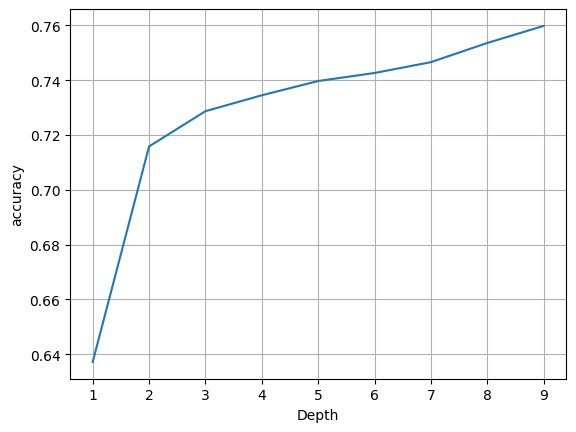

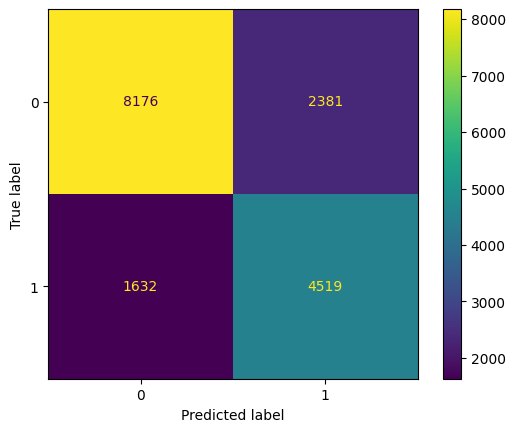

Max deep:  9
f1:  0.7622909310961694
Recall:  0.7598156571702178
Precision:  0.7678255677108797


In [43]:
pltx = []
plty = []

for depth in range(1, 10):
    model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
    predictions = model.predict(xTest)
    plty.append(accuracy_score(yTest, predictions))
    pltx.append(depth)

plt.plot(pltx, plty)
plt.xlabel('Depth')
plt.ylabel('accuracy')
plt.grid()
plt.show()

maxDepth = pltx[plty.index(max(plty))]
ConfusionMatrixDisplay.from_estimator(estimator=model, X=xTest, y=yTest)
plt.show()

print("Max deep: ", maxDepth)
print("f1: ", f1_score(yTest, predictions, average='weighted'))
print("Recall: ", recall_score(yTest, predictions, average='weighted'))
print("Precision: ", precision_score(yTest, predictions, average='weighted'))

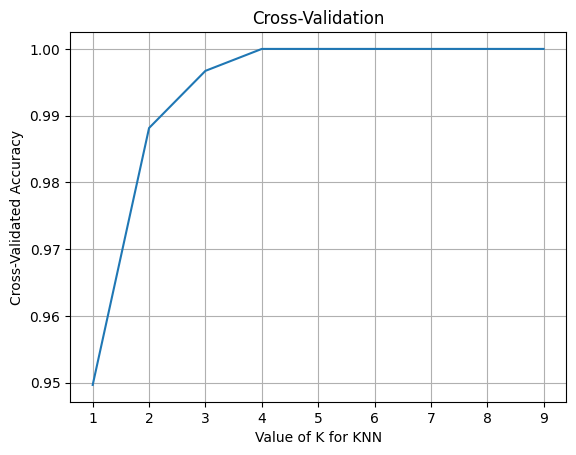

In [44]:
kScores = []
depthRange = range(1, 10)
for depth in depthRange:
  model = RandomForestClassifier(max_depth = depth).fit(xTraining, yTraining)
  kScores.append(cross_val_score(model, df, y, cv=5, scoring='accuracy').mean())

plt.plot(depthRange, kScores)
plt.title("Cross-Validation")
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()